# Label to Distribution 

- batch label to gaussian pdf 

In [29]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.modules.loss import _WeightedLoss
import matplotlib.pyplot as plt

In [18]:
label = torch.tensor([[0,0,0, 0, 0, 1, 0],[0,0,0, 0, 0, 1, 0]])
print(label.shape)

torch.Size([2, 7])


<BarContainer object of 7 artists>

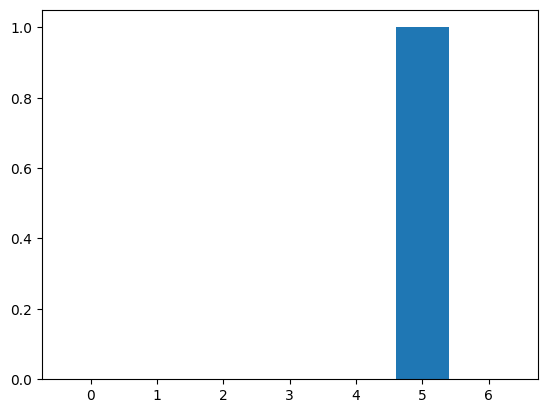

In [30]:
plt.bar([i for i in range(0,len(label[0]))], label[0])

In [19]:
def label_to_dist(label):
  gap_ = 1
  target_label_index = torch.where(label==1)[0][0].numpy()
  label_dist = [i for i in np.arange(target_label_index,0,-gap_)] + [i for i in np.arange(0,len(label) - target_label_index,gap_ )]
  return label_dist
#--

In [20]:
deviation = 1.0
y = torch.tensor([label_to_dist(la) for la in label]) * deviation
print(y)

tensor([[5., 4., 3., 2., 1., 0., 1.],
        [5., 4., 3., 2., 1., 0., 1.]])


In [21]:
def pdf_fn(x):
  x_pdf = torch.exp( -(x)**2 /2  ) * 1/( torch.pi * torch.sqrt(torch.tensor(2)) )
  return x_pdf

In [22]:
q = pdf_fn(y)
print(q)

tensor([[8.3879e-07, 7.5506e-05, 2.5004e-03, 3.0461e-02, 1.3652e-01, 2.2508e-01,
         1.3652e-01],
        [8.3879e-07, 7.5506e-05, 2.5004e-03, 3.0461e-02, 1.3652e-01, 2.2508e-01,
         1.3652e-01]])


<BarContainer object of 7 artists>

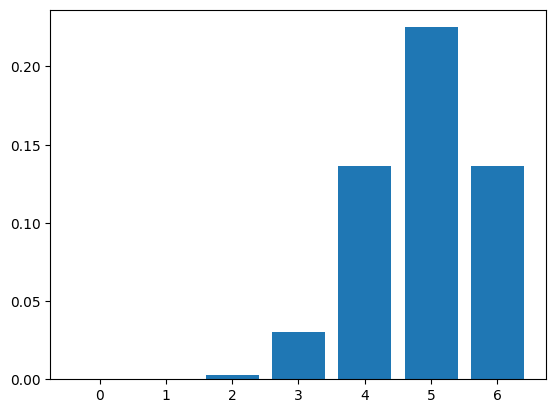

In [23]:
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(q[0]))], q[0])

In [24]:
q[0] = q[0] / sum(q[0])

In [25]:
q[1] = q[1] / sum(q[1])

In [26]:
print(sum(q[0]))

tensor(1.)


<BarContainer object of 7 artists>

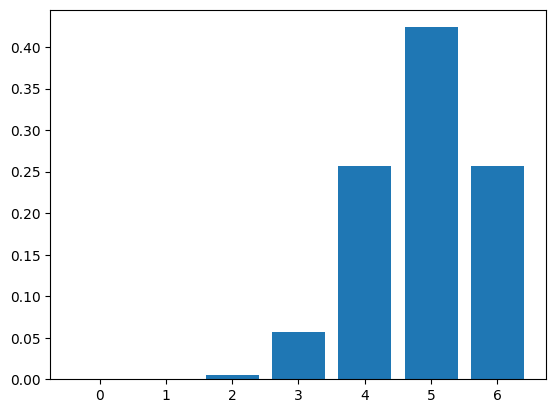

In [27]:
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(q[0]))], q[0])

In [28]:
q[0]

tensor([1.5792e-06, 1.4215e-04, 4.7075e-03, 5.7349e-02, 2.5702e-01, 4.2376e-01,
        2.5702e-01])